In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import keras
# from keras.models import Sequential
# from keras.optimizers import Adam
# from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
# import imgaug as ia
# import imgaug.augmenters as iaa
# from tensorflow.keras.callbacks import EarlyStopping

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import re

def extract_number_from_filename(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else -1

def load_and_display_images(folder_path):
    images = []
    image_names = []

    images_in = os.listdir(folder_path)
    images_in = sorted(images_in, key=extract_number_from_filename)

    for file_name in images_in:
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path)

        # Crop the image to the region of interest
        x, y, w, h = 96, 400, 384, 80
        cropped_img = img[y:y+h, x:x+w]

        # Display image
        # plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        # plt.title(file_name)
        # plt.axis('off')
        # plt.show()

        images.append(cropped_img)
        image_names.append(file_name)

    return images, image_names

folder_path = "C:\\Users\\SIYA\\Downloads\\Processed_data_cnn\\good_data"
captured_images = []
image_names = []
loaded_images = []
unloaded_images = []

files = os.listdir(folder_path)

for file_name in files:
    print(file_name)
    file_path = os.path.join(folder_path, file_name)
    temp_images, temp_image_names = load_and_display_images(file_path)
    print(len(temp_images))
    captured_images.append(temp_images)
    image_names.append(temp_image_names)

# Extract images from the first set (HRNL folder)
hrnl_images = captured_images[0]
hrnlbend_images = captured_images[1]
rlbend_images = captured_images[2]
rnlbend_images = captured_images[3]
wbrl_images = captured_images[4]
wbrnl_images = captured_images[5]

# Categorize the first 400 images as 'unloaded' and the rest as 'loaded'
# Remove the first 100 unloaded images from each folder
del hrnl_images[:100]
del hrnlbend_images[:100]
del rlbend_images[:100]
del rnlbend_images[:100]
del wbrl_images[:100]
del wbrnl_images[:100]

# Categorize the first 400 images as 'unloaded' and the rest as 'loaded'

unloaded_images.extend(hrnl_images[:340])
loaded_images.extend(hrnl_images[340:])

unloaded_images.extend(hrnlbend_images[:426])
loaded_images.extend(hrnlbend_images[426:])

unloaded_images.extend(rlbend_images[:471])
loaded_images.extend(rlbend_images[471:])

unloaded_images.extend(rnlbend_images[:266])
loaded_images.extend(rnlbend_images[266:])

unloaded_images.extend(wbrl_images[:418])
loaded_images.extend(wbrl_images[418:])

unloaded_images.extend(wbrnl_images[:447])
loaded_images.extend(wbrnl_images[447:])


print("Number of Unloaded Images:", len(unloaded_images))
print("Number of Loaded Images:", len(loaded_images))


HRNL
818
HRNLBend
867
RLBend
976
RNLBend
736
WBRL
836
WBRNL
949
Number of Unloaded Images: 2368
Number of Loaded Images: 2214


In [2]:
print(len(captured_images[0])) #hrnl
print(len(captured_images[4])) #wbrl

718
736


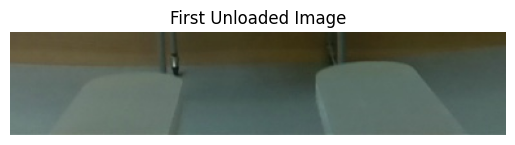

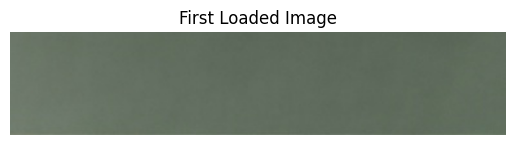

In [3]:
plt.imshow(cv2.cvtColor(unloaded_images[0], cv2.COLOR_BGR2RGB))
plt.title("First Unloaded Image")
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(loaded_images[0], cv2.COLOR_BGR2RGB))
plt.title("First Loaded Image")
plt.axis('off')
plt.show()

In [3]:
# import cv2
# import numpy as np

# def augment_data(images):
#     augmented_images = []
    
#     for img in images:
#         # Flip horizontally
#         flipped_img = cv2.flip(img, 1)
        
#         # Rotate by 90 degrees clockwise
#         rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        
#         # Scale the image by 0.8
#         scaled_img = cv2.resize(img, None, fx=0.8, fy=0.8)
        
#         # Adjust brightness and contrast
#         brightness = 30
#         contrast = 1.5
#         adjusted_img = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)
        
#         augmented_images.extend([flipped_img, rotated_img, scaled_img, adjusted_img])
    
#     return augmented_images

# # Augment unloaded images
# augmented_unloaded_images = augment_data(unloaded_images)

# # Augment loaded images
# augmented_loaded_images = augment_data(loaded_images)

# # Concatenate original and augmented data
# print("Number of Augmented Unloaded Images:", len(augmented_unloaded_images))
# print("Number of Augmented Loaded Images:", len(augmented_loaded_images))


import os
import cv2
import numpy as np
import pandas as pd
import random
import re
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from imgaug import augmenters as iaa

def zoom(image_to_zoom):
  zoom_func = iaa.Affine(scale=(1,1.3))
  z_image = zoom_func.augment_image(image_to_zoom)
  return z_image

def pan(image_to_pan):
  pan_func = iaa.Affine(translate_percent={"x": (-0.1,0.1), "y": (-0.1,0.1)})
  pan_image = pan_func.augment_image(image_to_pan)
  return pan_image

def img_random_brightness(image_to_brighten):
  bright_func = iaa.Multiply((0.2,1.2))
  bright_image = bright_func.augment_image(image_to_brighten).astype("uint8")
  return bright_image

def random_shadow(image_to_shadow):
  shadow_func = iaa.AdditiveGaussianNoise(scale=(0.5,0.7))
  shadow_image = shadow_func.augment_image(image_to_shadow)
  return shadow_image

def img_random_shear(image_to_shear):
    shear_func = iaa.Affine(shear=(-10, 10))
    sheared_image = shear_func.augment_image(image_to_shear)
    return sheared_image

def img_random_color_jitter(image_to_jitter):
    jitter_func = iaa.AddToHueAndSaturation((-20, 20), per_channel=True)
    jittered_image = jitter_func.augment_image(image_to_jitter)
    return jittered_image

def img_perspective_transform(image_to_transform):
    perspective_func = iaa.PerspectiveTransform(scale=(0.01, 0.15))
    perspective_image = perspective_func.augment_image(image_to_transform)
    return perspective_image

def img_random_noise(image_to_noise):
    noise_func = iaa.AdditiveGaussianNoise(loc=0, scale=(0.01*255, 0.05*255))
    noisy_image = noise_func.augment_image(image_to_noise)
    return noisy_image

#Function to augment data
def augment_data(images):
    augmented_images = []
    for img in images:
        augmented_images.append(img)
        augmented_images.append(zoom(img))
        augmented_images.append(pan(img))
        augmented_images.append(img_random_brightness(img))
        augmented_images.append(random_shadow(img))
        augmented_images.append(img_random_shear(img))
        augmented_images.append(img_random_color_jitter(img))
        augmented_images.append(img_perspective_transform(img))
        augmented_images.append(img_random_noise(img))
    return augmented_images

# Augment unloaded images
augmented_unloaded_images = augment_data(unloaded_images)

# Augment loaded images
augmented_loaded_images = augment_data(loaded_images)

print("Number of Augmented Unloaded Images:", len(augmented_unloaded_images))
print("Number of Augmented Loaded Images:", len(augmented_loaded_images))


Number of Augmented Unloaded Images: 21312
Number of Augmented Loaded Images: 19926


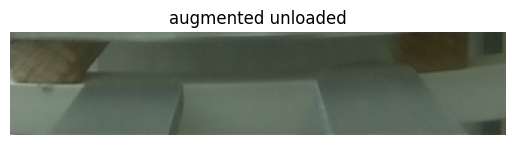

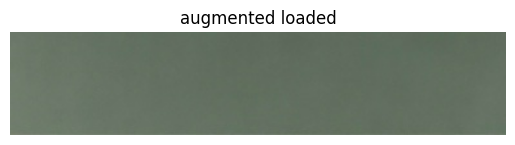

In [4]:
plt.imshow(cv2.cvtColor(augmented_unloaded_images[1111], cv2.COLOR_BGR2RGB))
plt.title("augmented unloaded")
plt.axis('off')
plt.show()
plt.imshow(cv2.cvtColor(augmented_loaded_images[3222], cv2.COLOR_BGR2RGB))
plt.title("augmented loaded")
plt.axis('off')
plt.show()


In [5]:
# Step 3: Combine Data
X_train = np.array(augmented_unloaded_images + augmented_loaded_images)
y_train = np.array([0] * len(augmented_unloaded_images) + [1] * len(augmented_loaded_images))

# Get the dimensions of the input images
height, width, channels = X_train.shape[1:]

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 5: Define Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Step 6: Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Train Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)



c:\Users\SIYA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 698s 651ms/step - accuracy: 0.7833 - loss: 29.5586 - val_accuracy: 0.8982 - val_loss: 0.2722
Epoch 2/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 598s 580ms/step - accuracy: 0.9218 - loss: 0.2668 - val_accuracy: 0.9490 - val_loss: 0.1586
Epoch 3/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 664s 643ms/step - accuracy: 0.9157 - loss: 0.2046 - val_accuracy: 0.8685 - val_loss: 0.3660
Epoch 4/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2921s 3s/step - accuracy: 0.8286 - loss: 0.3493 - val_accuracy: 0.9591 - val_loss: 0.1429
Epoch 5/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 802s 774ms/step - accuracy: 0.9651 - loss: 0.1197 - val_accuracy: 0.9559 - val_loss: 0.1272
Epoch 6/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 637s 614ms/step - accuracy: 0.8740 - loss: 0.2437 - val_accuracy: 0.6202 - val_loss: 0.6322
Epoch 7/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 602s 581ms/step - accuracy: 0.9373 - loss: 0.2004 - val_accuracy: 0.9686 - val_loss: 0.1298
Epoch 8/10
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 680s 659ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


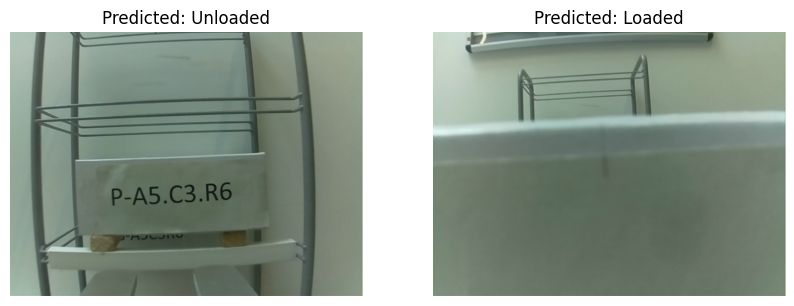

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Function to preprocess image
def preprocess_image(image):
    # Resize image to match input shape of the model
    resized_image = cv2.resize(image, (384, 80))
    # Convert image to float32 and normalize pixel values
    normalized_image = resized_image.astype('float32') / 255.0
    # Expand dimensions to match model input shape (add batch dimension)
    preprocessed_image = np.expand_dims(normalized_image, axis=0)
    return preprocessed_image

# Load two sample images
image1_path = "C:\\Users\\SIYA\\Downloads\\Processed_data_cnn\\good_data\\HRNL\\HRNL_194.jpg"
image2_path =  "C:\\Users\\SIYA\\Downloads\\Processed_data_cnn\\good_data\\HRNL\\HRNL_779.jpg"
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Preprocess images
preprocessed_image1 = preprocess_image(image1)
preprocessed_image2 = preprocess_image(image2)

# Predict labels for the images using the trained model
prediction1 = model.predict(preprocessed_image1)
prediction2 = model.predict(preprocessed_image2)

# Define label names
label_names = ['Unloaded', 'Loaded']

# Display the images along with their predicted labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {label_names[int(round(prediction1[0][0]))]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {label_names[int(round(prediction2[0][0]))]}")
plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


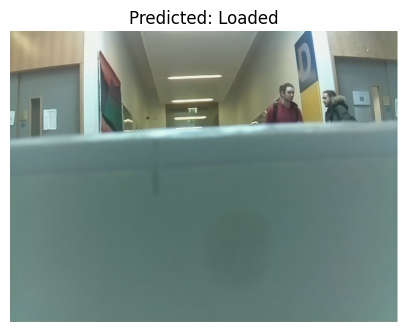

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


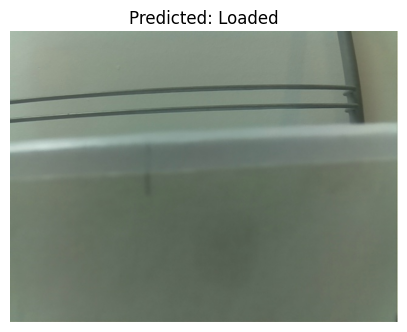

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


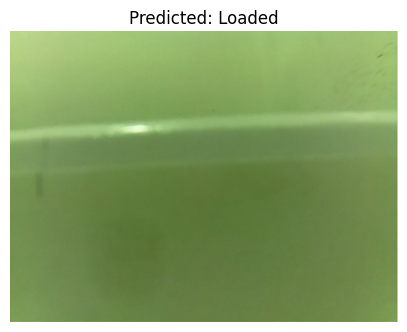

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


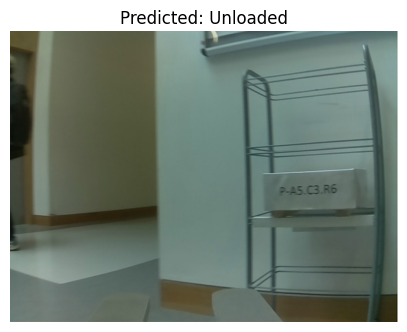

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


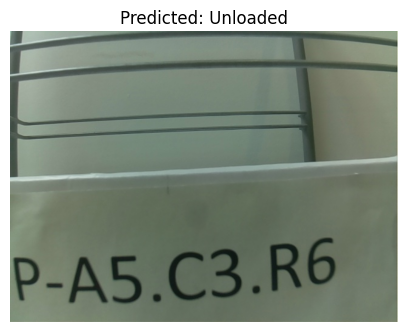

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


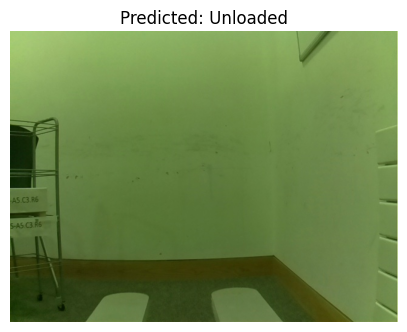

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


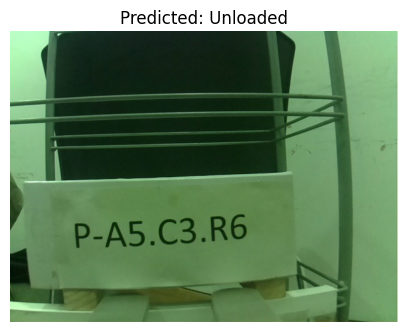

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


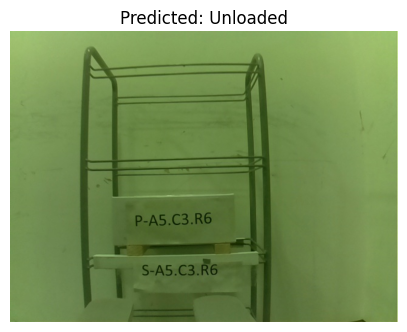

In [22]:
import os

# Function to preprocess image
def preprocess_image(image):
    # Resize image to match input shape of the model
    resized_image = cv2.resize(image, (384, 80))
    # Convert image to float32 and normalize pixel values
    normalized_image = resized_image.astype('float32') / 255.0
    # Expand dimensions to match model input shape (add batch dimension)
    preprocessed_image = np.expand_dims(normalized_image, axis=0)
    return preprocessed_image

# Path to the folder containing images
folder_path = "C:\\Users\\SIYA\\Downloads\\Processed_data_cnn\\good_data\\Test\\"

# List all files in the folder
image_files = os.listdir(folder_path)

# Loop through each image file
for file_name in image_files:
    # Construct full path to the image file
    image_path = os.path.join(folder_path, file_name)
    
    # Load image
    image = cv2.imread(image_path)
    
    # Preprocess image
    preprocessed_image = preprocess_image(image)
    
    # Predict label for the image using the trained model
    prediction = model.predict(preprocessed_image)
    
    # Display the image along with its predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {label_names[int(round(prediction[0][0]))]}")
    plt.axis('off')
    plt.show()
